<a href="https://colab.research.google.com/github/yellenkibhavyasri/House--price-prediction/blob/main/House_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:

housing = fetch_california_housing(as_frame=True)
df = housing.frame


df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:

df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


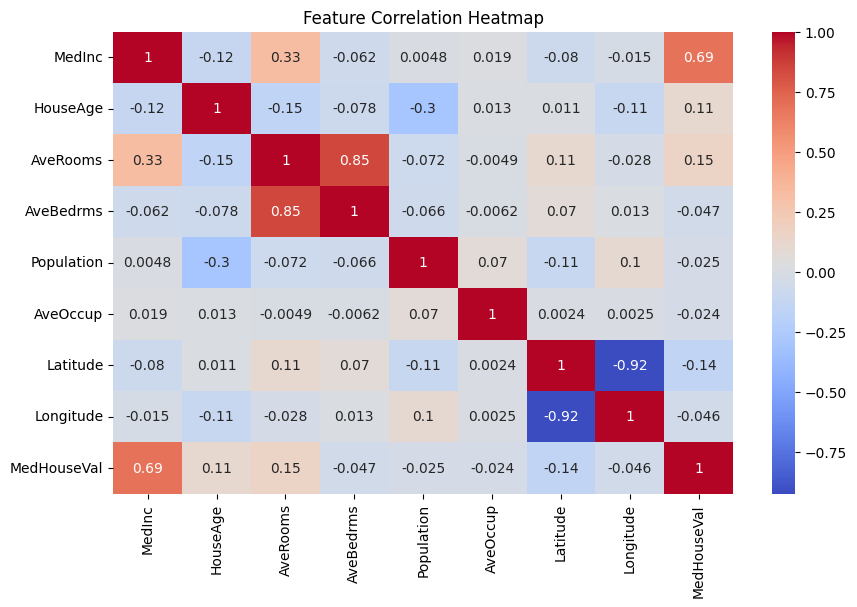

In [4]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [7]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:

y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("R² Score (Accuracy-like):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R² Score (Accuracy-like): 0.805024407701793
Mean Absolute Error (MAE): 0.32761306601259704
Mean Squared Error (MSE): 0.25549776668540763
Root Mean Squared Error (RMSE): 0.5054678690929896


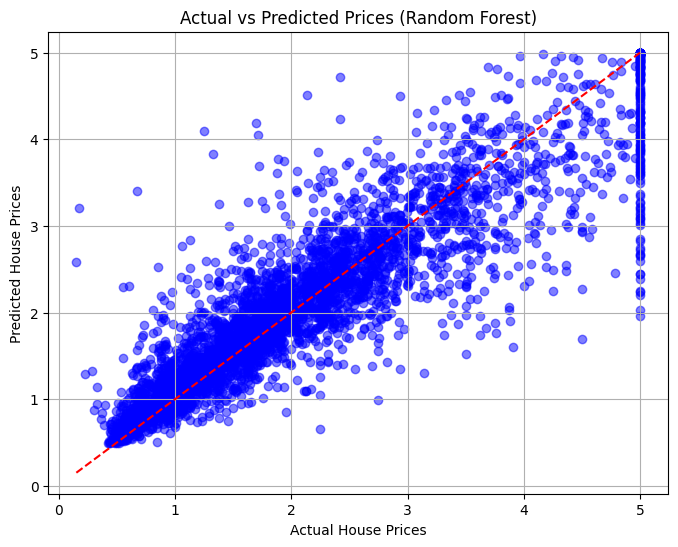

In [9]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, c='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.grid(True)
plt.show()


In [10]:

!pip install gradio --quiet
import gradio as gr

def predict_price(medinc, houseage, averooms, avebedrms, population, aveoccup, latitude, longitude):
    input_data = np.array([[medinc, houseage, averooms, avebedrms, population, aveoccup, latitude, longitude]])
    input_scaled = scaler.transform(input_data)
    prediction = rf_model.predict(input_scaled)[0]
    return f"${prediction * 100000:.2f}"

iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Median Income"),
        gr.Number(label="House Age"),
        gr.Number(label="Average Rooms"),
        gr.Number(label="Average Bedrooms"),
        gr.Number(label="Population"),
        gr.Number(label="Average Occupants"),
        gr.Number(label="Latitude"),
        gr.Number(label="Longitude"),
    ],
    outputs=gr.Textbox(label="Predicted House Price"),
    title="🏠 House Price Prediction",
    description="Enter house features to predict the price using Random Forest"
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://daa08dc2b30eb1cde9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
